
# Trabajo Práctico Netflix
#### Integrantes: Lucas Crespo, Nicolás Cuenca, Ignacio J. Kirchuk y Santiago Resnik 
[Link](https://docs.google.com/document/d/10WfCkmVFVB0ajJueBD7F5wmoKHKfUKGWVbcCIragSKk/edit)

Objetivos:
- Contabilizar el dispositivo con el que más títulos se reprodujeron.
- Encontrar la película con más ocurrencias y la película con mayor duración total.
- Generar un TOP “N” de series vistas y graficar.
  - Por tiempo visto
  - Por ocurrencias
- Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años del repo.
- Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.
- Total de días de todos los títulos reproducidos.


# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np

# Leer CSV

In [6]:
banned = ['Sony ps4', 'Netflix Windows App - Cadmium Windows Mobile','Apple iPhone 6s','Apple iPhone 7 Plus (CDMA)','Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV','iPhone 5S GSM','Google Chromecast V3 Streaming Stick']
df = pd.read_csv("NetflixHistory.csv") # Cargar el CSV
for i in banned: # Recorre la lista de los dispositivos baneados
  df = df.drop(df[df['Device Type'] == i].index) # Elimina los indices que tengan los dispositivos baneados

# Ejercicio A
### Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [7]:
devices = df['Device Type'].value_counts() # Obtiene todas las veces que aparecen los dispositivos en la comuna
print("El dispositivo mas usado es: {} con {} usos".format(devices.idxmax(), devices[0]))

El dispositivo mas usado es: Apple Apple TV 4 Apple TV con 3519 usos


# Ejercicio B
### Encontrar la película con más ocurrencias y la película con mayor duración total.

In [8]:
# Más Ocurrencias
peliculas = df['Title']

# sacar series de la lista (estoy seguro que esto está probablemente mal planteado pero en su momento lo hice un funcionó, aunque seguramente se pueda hacer llamando a un par de métodos de pandas)
for peli in peliculas:
  peliculas = df['Title']
  if peli.count(":") > 2 or peli.__contains__("Temporada") or peli.__contains__("Season") or peli.__contains__("Clip"): # detecta si tiene mas de dos ":" o cualquiera de las palabras clave
      df = df.drop(df[df['Title'] == peli].index) # saca la serie con ese titulo del df

print("La película más vista fue {} con {} ocurrencias".format(peliculas.value_counts().idxmax(0), peliculas.value_counts()[0]))

# Mayor Duración

# primero intenté hacer un algoritmo para sortearlo como si fuese una especie de lista
"""dur_tot = [0,0,0]
name_longest = ""
for peli in peliculas:
  durpelis = df.loc[df['Title'] == peli]['Duration'].values #agarro los valores de duración
  to_add = [0,0,0,]
  for durpeli in durpelis: # convierto la duración en una lista de horas-minutos-segundos
    durpeli = durpeli.split(":")
    for i in range(len(durpeli)):
      to_add[i] += int(durpeli[i])
      
  for i in range(1, 3): # arreglo el recuento de horas-minutos-segundos
    while to_add[i] >= 60:
      to_add[i] -= 60
      to_add[i-1] += 1

  for i in range(0,3): # chequeo si es mas grande que el actualmente mas grande
    if to_add[i] > dur_tot[i]:
      dur_tot = to_add
      name_longest = peli
      break

print("\n"+str(name_longest)+" es la peli que mas tiempo fue vista. Durando "+str(dur_tot[0])+" horas, "+str(dur_tot[1])+" minutos, y "+str(dur_tot[2])+" segundos.")"""

# o puedo hacer (como me encontre en el video https://www.youtube.com/watch?v=T11QYVfZoD0&ab_channel=CoreySchafer)

pelis = df.sort_values(by="Duration", ascending=False) # sorteo por la duración en descendiente (porque si lo hago en ascendiente me da el valor mas chico)
pelis.filter(['Title', 'Duration']).head(1) # printeo el titulo y tiempo de la peli con mas duración

La película más vista fue El código enigma con 7 ocurrencias


,Title,Duration
4654,Sueños de fuga,02:20:46


# Ejercicio C
###Generar un TOP “N” de series vistas y graficar.

1.   Por tiempo visto
2.   Por ocurrencias




In [15]:
n = int(input()) #Input

banned = ['Sony ps4', 'Netflix Windows App - Cadmium Windows Mobile','Apple iPhone 6s','Apple iPhone 7 Plus (CDMA)','Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV','iPhone 5S GSM','Google Chromecast V3 Streaming Stick']
df = pd.read_csv("NetflixHistory.csv") # Cargar el CSV
for i in banned: # Recorre la lista de los dispositivos baneados
  df = df.drop(df[df['Device Type'] == i].index) # Elimina los indices que tengan los dispositivos baneados
series = df['Title'] #Columna que represente a las series

for i in series:
  if i.count(":") > 2 or i.__contains__("Temporada") or i.__contains__("Season") or i.__contains__("Capítulo"):
    pass
  else:
    df = df.drop(df[series == i].index)
#Si un titulo no cuenta con más de 2 dos puntos, o no tiene la palabra temporada, 
#season, o capitulo, es porque no es una serie, asi que lo eliminamos del df
#Ahora el df y la columna de titulos (variable series) reflejan las series unicamente

df

8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


###1 - Por tiempo visto

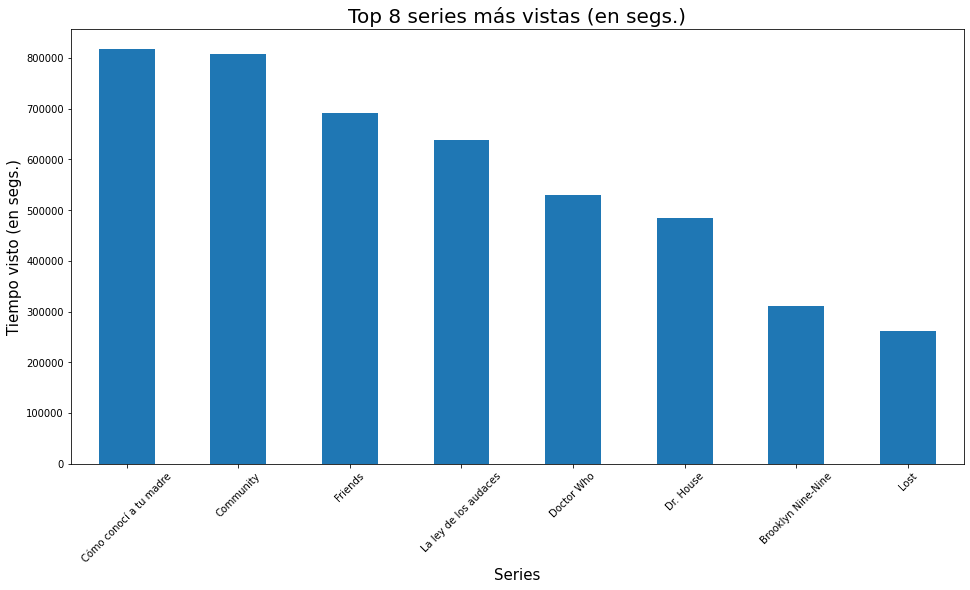

In [30]:
nombresub = lambda sub: sub.split(':')[0] #funcion lambda que corta hasta el ':' del valor dado
df['Title'] = df['Title'].apply(nombresub).to_frame() #se lo aplicamos a las series, de tal forma que solo queden sus nombres

def convertir_a_segs(row):
    h, m, s = row.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

df['sec'] = df['Duration'].apply(convertir_a_segs) 
#creamos una funcion que convierta los valores la columna de duracion en HH:MM:SS
#a segundos, y lo ponemos en una nuevae columna 'sec'. esto para tener todas las series en un valor numerico igual

grp = df.groupby('Title')
result = grp['sec'].sum()
result = result.sort_values(ascending=False).head(n)
#agrupamos las series y sumamos sus segundos, para despues sortear las n series de mayor a menor

plt.figure(figsize=(n*2,n))
result.plot.bar()
plt.xlabel('Series', fontSize=15)
plt.xticks(rotation=45)
plt.ylabel('Tiempo visto (en segs.)', fontSize=15)
plt.title("Top "+str(n)+" series más vistas (en segs.)", fontSize=20)
plt.show()
#graficamos

###2 - Por Ocurrencias

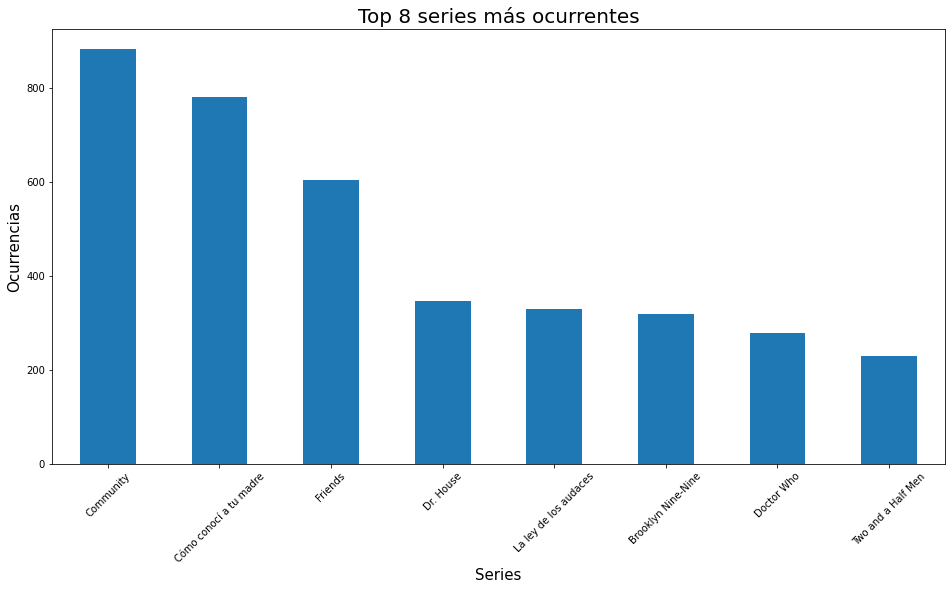

In [31]:
nombresub = lambda sub: sub.split(':')[0] #funcion lambda que corta hasta el ':' del valor dado
df['Title'] = df['Title'].apply(nombresub).to_frame() #se lo aplicamos a las series, de tal forma que solo queden sus nombres
seriesOcc = df['Title'].value_counts().head(n) #contabilizamos las apariciones con value_counts(), y con head(n) que sean las n series 

plt.figure(figsize=(n*2,n))
seriesOcc.plot.bar()
plt.xlabel('Series', fontSize=15)
plt.xticks(rotation=45)
plt.ylabel('Ocurrencias', fontSize=15)
plt.title("Top "+str(n)+" series más ocurrentes", fontSize=20)
plt.show()
#graficamos

# Ejercicio D

###Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.


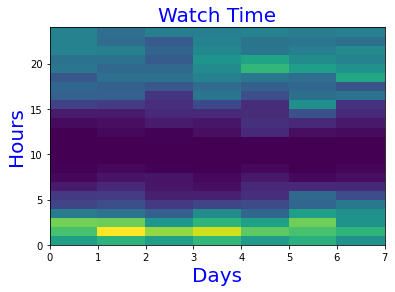

In [27]:
matrix = np.zeros((24,7)) # Creamos una matriz por el numero de hora y de dias a la semana que contenga zeros

def getDate(data): # Funcion que es recorrida por pandas
  date = datetime.strptime(data,'%Y-%m-%d %H:%M:%S') # Lo convertimos en formato DateTime
  day = date.weekday() # Obtenemos el dia 
  time = date.hour # Obtenemos la hora 
  matrix[time][day] += 1 # Sumamos

df["Start Time"].apply(getDate) # Se le aplica a todo
# Se muestra el mapa de color
plt.title("Watch Time", color="blue", fontsize=20)
plt.xlabel("Days", color="blue", fontsize=20)
plt.ylabel("Hours", color="blue", fontsize=20)
map = plt.pcolormesh(matrix) 
plt.show()

# Ejercicio E

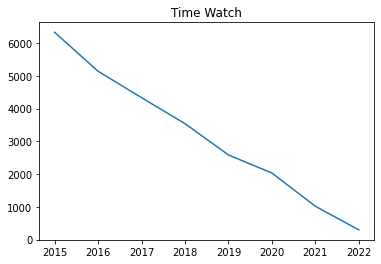

In [24]:
banned = ['Sony ps4', 'Netflix Windows App - Cadmium Windows Mobile','Apple iPhone 6s','Apple iPhone 7 Plus (CDMA)','Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV','iPhone 5S GSM','Google Chromecast V3 Streaming Stick']
df = pd.read_csv("NetflixHistory.csv") # Cargar el CSV
for i in banned: # Recorre la lista de los dispositivos baneados
  df = df.drop(df[df['Device Type'] == i].index) # Elimina los indices que tengan los dispositivos baneados
year = [2022, 2021,2020,2019, 2018,2017,2016,2015]
count = []

for i in year: 
  date = df['Start Time'].astype('datetime64[ns]')
  count.append(df[date > datetime.strptime(str(i),'%Y')].shape[0])
plt.title("Time Watch")
plt.plot(year,count)
plt.show()

# Ejercicio F
### Total de días de todos los títulos reproducidos.


In [23]:
banned = ['Sony ps4', 'Netflix Windows App - Cadmium Windows Mobile','Apple iPhone 6s','Apple iPhone 7 Plus (CDMA)','Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV','iPhone 5S GSM','Google Chromecast V3 Streaming Stick']
df = pd.read_csv("NetflixHistory.csv") # Cargar el CSV
for i in banned: # Recorre la lista de los dispositivos baneados
  df = df.drop(df[df['Device Type'] == i].index) # Elimina los indices que tengan los dispositivos baneados
hours = []
for i in df['Duration']:
  time = i.split(':')
  hours.append(int(time[0]) + int(time[1]) / 60 + (int(time[2]) / 60) / 60)
print("Los dias totales de visualizacion son", round(sum(hours) / 24), "dias.")

Los dias totales de visualizacion son 101 dias.
